In [2]:
import pandas as pd

r=pd.read_csv('ratings.csv')

r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
m=pd.read_csv('movies.csv')

m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
r.shape

(100836, 4)

In [5]:
m.shape

(9742, 3)

In [6]:
r.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
m.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [8]:
d=pd.merge(r,m,on='movieId')

d.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
import datetime

from datetime import datetime, date

d['datetime']=pd.to_datetime(d['timestamp'])

In [10]:
d.shape

(100836, 7)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

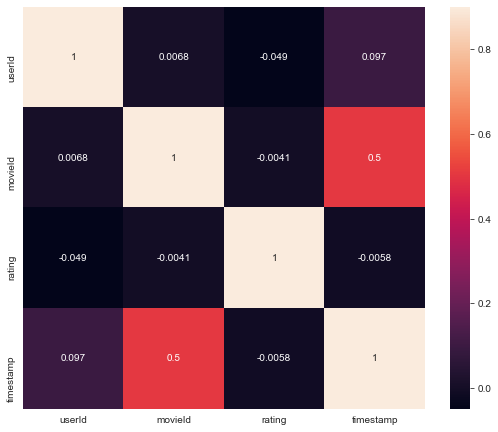

In [39]:
cm=d.corr()
fig=plt.figure(figsize=(9,7.4))

sns.heatmap(cm,annot=True,vmax=.9,square=True)

plt.show()

In [13]:
d.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
datetime     85043
dtype: int64

In [14]:
d.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
a=d
a=a.groupby('title')['rating'].mean()

(a.head(20))

title
'71 (2014)                                     4.000000
'Hellboy': The Seeds of Creation (2004)        4.000000
'Round Midnight (1986)                         3.500000
'Salem's Lot (2004)                            5.000000
'Til There Was You (1997)                      4.000000
'Tis the Season for Love (2015)                1.500000
'burbs, The (1989)                             3.176471
'night Mother (1986)                           3.000000
(500) Days of Summer (2009)                    3.666667
*batteries not included (1987)                 3.285714
...All the Marbles (1981)                      2.000000
...And Justice for All (1979)                  3.166667
00 Schneider - Jagd auf Nihil Baxter (1994)    4.500000
1-900 (06) (1994)                              4.000000
10 (1979)                                      3.375000
10 Cent Pistol (2015)                          1.250000
10 Cloverfield Lane (2016)                     3.678571
10 Items or Less (2006)                   

In [16]:
sa=a.sort_values(ascending=False)

In [17]:
sa.head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [18]:
b=d.groupby('title')['rating'].count()

b.head()

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: rating, dtype: int64

In [19]:
nr=pd.DataFrame()

nr['Average_ratings']=a

nr['Count_total_ratings']=b
nr.head(10)

,Average_ratings,Count_total_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


In [20]:
nr.columns

Index(['Average_ratings', 'Count_total_ratings'], dtype='object')

Text(0, 0.5, 'Count of Movies')

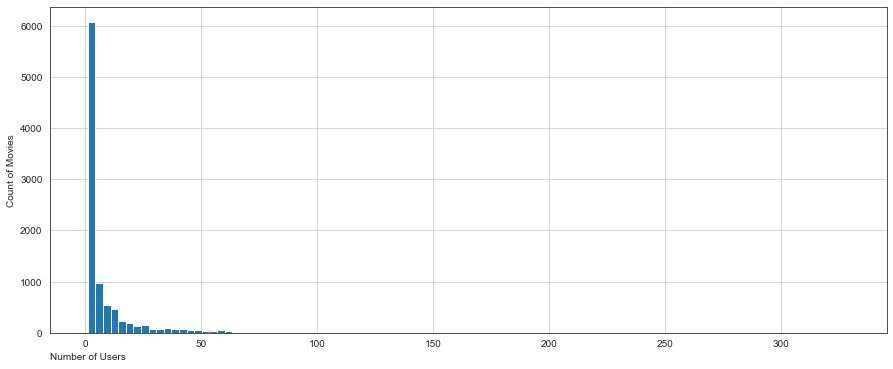

In [75]:
plt.figure(figsize=(15,6))

b=nr['Count_total_ratings'].hist(bins=100)
b.set_xlabel("Number of Users",loc='left')
b.set_ylabel("Count of Movies")

Text(0, 0.5, 'Count of Movies')

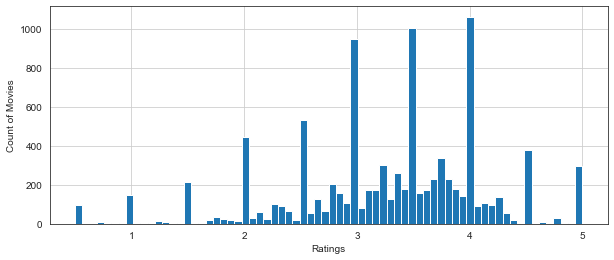

In [77]:
plt.figure(figsize=(10,4))

b=nr['Average_ratings'].hist(bins=70)

b.set_xlabel("Ratings")
b.set_ylabel("Count of Movies")

<Figure size 576x432 with 0 Axes>

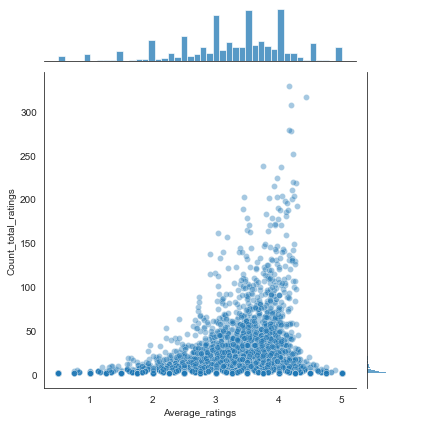

In [23]:
plt.figure(figsize=(8,6))

sns.jointplot(x='Average_ratings',y='Count_total_ratings',data=nr,alpha=0.4)

In [24]:
mm=d.pivot_table(index='userId',columns='title',values='rating')

mm.head()
mm

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [25]:
mm['xXx (2002)']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), Length: 610, dtype: float64

In [26]:
x=mm['xXx (2002)']

In [27]:
x.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

In [28]:
mx=mm.corrwith(x)

mx

C:\Users\sunny\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\sunny\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.762493
xXx (2002)                                   1.000000
xXx: State of the Union (2005)               0.943880
¡Three Amigos! (1986)                        0.500000
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [29]:
xx=pd.DataFrame(mx,columns=['Correlation'])
xx.dropna(inplace=True)

xx.sort_values(by=['Correlation'],ascending=False)

,Correlation
title,
Gangster Squad (2013),1.0
Killers (2010),1.0
Richard III (1995),1.0
"Grey, The (2012)",1.0
The Hobbit: The Battle of the Five Armies (2014),1.0
...,...
Wing Commander (1999),-1.0
Mary and Max (2009),-1.0
Furious 7 (2015),-1.0


In [30]:
pd.set_option('display.max_rows', len(m))
u=m['title']
m['title']

0                                        Toy Story (1995)
1                                          Jumanji (1995)
2                                 Grumpier Old Men (1995)
3                                Waiting to Exhale (1995)
4                      Father of the Bride Part II (1995)
5                                             Heat (1995)
6                                          Sabrina (1995)
7                                     Tom and Huck (1995)
8                                     Sudden Death (1995)
9                                        GoldenEye (1995)
10                         American President, The (1995)
11                     Dracula: Dead and Loving It (1995)
12                                           Balto (1995)
13                                           Nixon (1995)
14                                Cutthroat Island (1995)
15                                          Casino (1995)
16                           Sense and Sensibility (1995)
17            

In [31]:
import tkinter as tk
import time

l=list(m.index)
s=list(m.title)
# Top level window
frame = tk.Tk()
frame.title("Movie Recommendation System")
frame.geometry('400x450')
# Function for getting Input
# from textbox and printing it 

def func(inp):
    x=mm[inp]
    mx=mm.corrwith(x)
    xx=pd.DataFrame(mx,columns=['Correlation'])
    xx.dropna(inplace=True)
    x=xx.sort_values(by=['Correlation'],ascending=False).head(10)
    #print('Movie Watched: ',inp)
    if(len(x)==0):
        lbl.config(text ='\nNo movies are present to be recommended:\n\n')
    else:
        i=0
        bl.config(text="The recommended movies are:\n")
        while(i<10):
                tk.Label(frame,text =list(x.index)[i]).pack()
                frame.update() # allow window to catch up
                time.sleep(1)
                i += 1
        #lbl.config(text ='\nThe recommended movies are:\n\n'+x)

def perform():
    abc = inputtxt.get(1.0, "end-1c").strip()
    try:
        abc=int(abc)
        if abc in l:
            a=m.iloc[abc].title
            func(a)
        else:
            lbl.config(text ="\nThe value is not in the list.")
    except ValueError:
        if abc in s:
            a=abc
            func(a)
            pass
        else:
            lbl.config(text = "\nPlease enter a valid input")
  
# TextBox Creation
tk.Label(frame, text = "\nEnter the movie name or its index to obtain recommendation output:\n").pack()
inputtxt = tk.Text(frame,
                   height = 5,
                   width = 20)
  
inputtxt.pack()
  
# Button Creation


printButton = tk.Button(frame,
                        text = "Proceed", 
                        command = perform)
printButton.pack()
  
# Label Creation
lbl = tk.Label(frame, text = "")
lbl.pack()
bl= tk.Label(frame, text = "")
bl.pack()
frame.mainloop()

C:\Users\sunny\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\sunny\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
import speech_recognition as sr
import pyttsx3

listener=sr.Recognizer()
e=pyttsx3.init()

try:
    e.say('I am your personal assisstant Jack. What can I do for you?')
    e.runAndWait()
    with sr.Microphone() as source:
        print('listening...')
        voice=listener.listen(source)
        command=listener.recognize_google(voice)
        command=command.lower()
        if 'jack' in command:
            ui=command

except:
    pass

listening...


In [32]:
import speech_recognition as sr
import pyttsx3

listener=sr.Recognizer()
e=pyttsx3.init()
kl=pyttsx3.init()
l=list(m.index)
s=list(m.title)
f=0
def feed(self):
    try:
        with sr.Microphone() as source:
            print('\nlistening...')
            voice=listener.listen(source)
            command=listener.recognize_google(voice)
            command=command.lower().strip()
            print(command)
            f=call(command)
            print(f)
        for i in list(f.index):
            kl.say(i)   
            kl.runAndWait()
    except:
        pass



def func(inp):
    x=mm[inp]
    mx=mm.corrwith(x)
    xx=pd.DataFrame(mx,columns=['Correlation'])
    xx.dropna(inplace=True)
    fin=xx.sort_values(by=['Correlation'],ascending=False).head(10)
    f=fin
        #print('Movie Watched: ',inp)
        #if(len(x)==0):
           # print('\nNo movies are present to be recommended:\n\n')
        #else:
           # print('\nThe recommended movies are:\n\n',(fin))
    return f

def call(ui):
    try:
        ui=int(ui)
        print(type(ui))
        if ui in l:
            a=m.iloc[ui].title
            f=func(a)
            return f
        else:
            print("\nThe value is not in the list.")
    except ValueError:
        if ui in s:
            a=ui
            f=func(a)
            return f
            pass
        else:
            print('\nPlease enter a valid input')

def novo(self):
    try:
        with sr.Microphone() as source:
            print('listening...')
            voice=listener.listen(source)
            command=listener.recognize_google(voice)
            command=command.lower().strip()
            print(command)
            if(command=='yes'):
                e.say("tell me the movie name:")
                novo()
            if command in s:
                e.say('Say 1 for movie\'s IMdB rating')
                novo()
            if command==(1 or '1'):
                e.say("The movie's Imdb rating is 12")
                
            
    except:
        pass

In [34]:
print('Welcome to Movie Recommendation System. Please tell me the index or name of the movie that you have watched.')
e.say('Welcome to Movie Recommendation System. Please tell me the index or name of the movie that you have watched.')
e.runAndWait()

feed(0)



Welcome to Movie Recommendation System. Please tell me the index or name of the movie that you have watched.

listening...
223
<class 'int'>


C:\Users\sunny\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\sunny\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                    Correlation
title                                          
Coneheads (1993)                            1.0
Waterworld (1995)                           1.0
Three Musketeers, The (1993)                1.0
Losing Isaiah (1995)                        1.0
Father of the Bride Part II (1995)          1.0
RoboCop 3 (1993)                            1.0
Kiss of Death (1995)                        1.0
Pretty Woman (1990)                         1.0
Casper (1995)                               1.0
Cliffhanger (1993)                          1.0


In [117]:
f

0

In [37]:
import speech_recognition as sr
import pyttsx3

listener=sr.Recognizer()
e=pyttsx3.init()
    

a=A()
a.output


<bound method A.output of <__main__.A object at 0x0000021C70F22EE0>>

In [ ]:

            if 'jack' in command:
                print(command)